<a href="https://colab.research.google.com/github/sinnarasam/jejudo/blob/main/jeju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

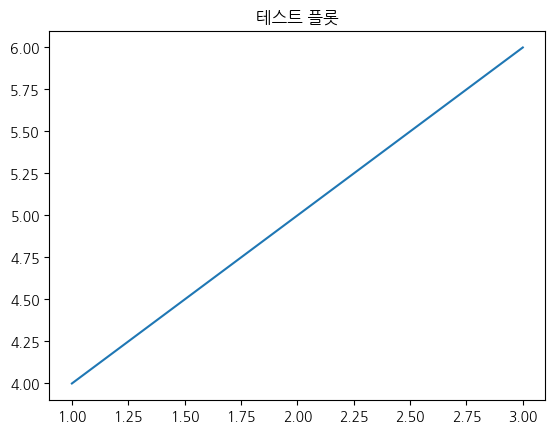

In [1]:
# 1. 나눔고딕 폰트 설치
!apt-get -qq install fonts-nanum

# 2. 설치한 폰트를 matplotlib에서 사용할 수 있도록 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 나눔 고딕 폰트 추가
plt.rcParams['font.family'] = 'NanumGothic'

# 3. 폰트 캐시 리빌드 (수정된 부분)
fm.findSystemFonts(fontpaths=None, fontext='ttf')
# findSystemFonts를 호출하여 폰트 캐시를 업데이트합니다.
# _rebuild는 private method이므로 직접 호출하지 않습니다.

# 4. 경고 메시지 확인용 샘플 플롯 그리기
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('테스트 플롯')
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', family= 'NanumGothic')

In [4]:
# prompt: 나눔고딕 폰트 설치여부 검사 코드를 알려줘

import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for font in font_list:
  if 'NanumGothic' in font:
    print(f"나눔고딕 폰트가 설치되어 있습니다: {font}")
    break
else:
  print("나눔고딕 폰트가 설치되어 있지 않습니다.")


나눔고딕 폰트가 설치되어 있습니다: /usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [5]:
df = pd.read_csv('/content/drive/MyDrive/data/data.csv')
df.set_index('측정 연도', inplace=True)
print(df)

       측정 월 정점명     수온
측정 연도                 
2004     11  대정  21.37
2005     11  대정  21.75
2006     11  대정  20.91
2007     11  대정  21.61
2008     11  대정  22.66
...     ...  ..    ...
2017     11  한림  21.59
2018     11  한림  19.53
2019     11  한림  20.91
2020     11  한림  20.19
2021     11  한림  19.20

[126 rows x 3 columns]


2050년 바다 수온을 알아 보고 싶은 제주도 수역을 아래에서 고르세요.
대정, 서귀포, 성산포, 제주, 조천, 표선, 한림

알아 보고 싶은 정점명을 입력해 주세요: 표선


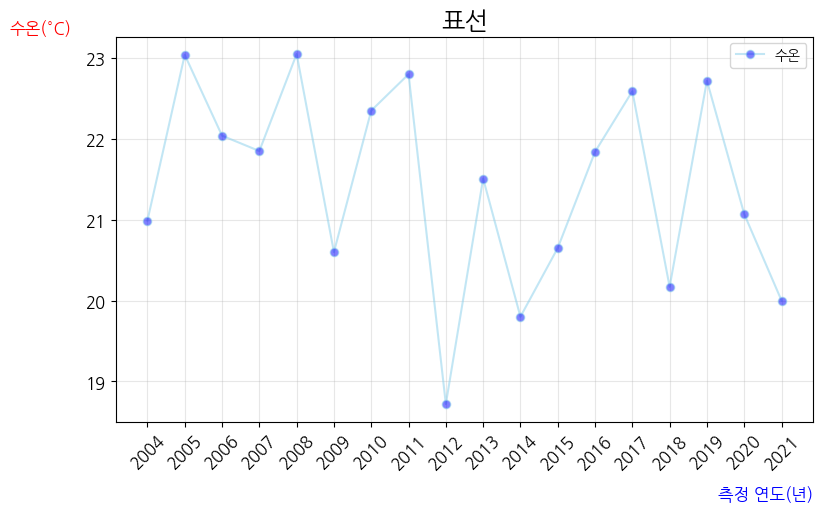

In [6]:
arr = df['정점명']
result = [] # 중복 제거된 값들이 들어갈 리스트

for value in arr:
    if value not in result:
        result.append(value)

n = 0
print('2050년 바다 수온을 알아 보고 싶은 제주도 수역을 아래에서 고르세요.')
for i in result:
    n += 1
    if n < 7:
      print(i, end=', ')
    else:
      print(i, end='')

print('\n')
location = input(f'알아 보고 싶은 정점명을 입력해 주세요: ')

if location not in result:
  print('\n')
  print("잘못 입력되어 자동으로 '제주'로 선택되었습니다.")
  location = '제주'

plt.figure(figsize=(9, 5))
df = df[df["정점명"] == location]
last_water_temperature = df.iloc[-1, -1]
df["수온"].plot(color="skyblue", alpha=0.5, marker='o', markerfacecolor='blue', markersize=6)
plt.xticks(np.arange(2004, 2022).tolist()  , rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('측정 연도(년)', labelpad=10, loc='right', color='blue', size=12)
plt.ylabel('수온(°C)', labelpad=10, loc='top', rotation=360, color='red', size=12)
plt.grid(alpha=0.3)
plt.title(location, size=18)
plt.legend()
plt.savefig('/content/drive/MyDrive/data/view-1.png')
plt.show()

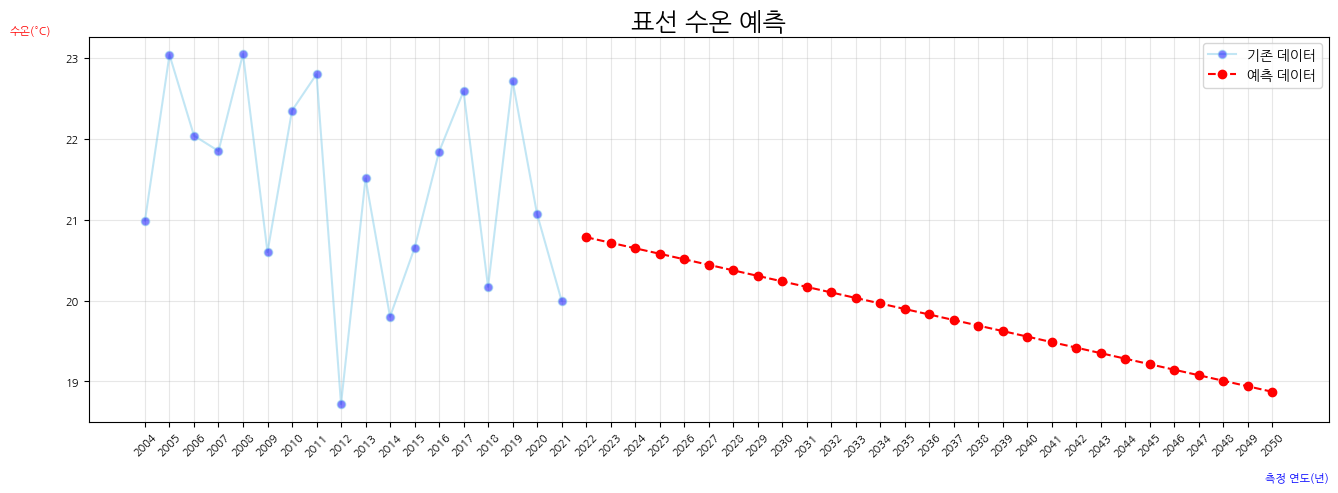

In [13]:
# 선형 회귀 모델을 사용하기 위해 LinearRegression 클래스를 가져옴
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델을 사용하여 2022년부터 2050년까지의 수온 예측
years = df.index.values.reshape(-1, 1)  # 인덱스(연도)를 2차원 배열로 변환합니다.
temperatures = df["수온"].values  # '수온' 열의 값을 배열로 가져옵니다.

model = LinearRegression()  # 선형 회귀 모델 객체를 만듭니다.
model.fit(years, temperatures)  # 모델을 학습시킵니다.

future_years = np.arange(2022, 2051).reshape(-1, 1)  # 2022년부터 2050년까지의 연도를 배열로 만듭니다.
predicted_temperatures = model.predict(future_years)  # 미래 연도의 수온을 예측합니다.

# 예측 결과 시각화
plt.figure(figsize=(16, 5))
plt.plot(df.index, df["수온"], color="skyblue", alpha=0.5, marker='o', markerfacecolor='blue', markersize=6, label='기존 데이터')  # 기존 데이터를 그래프로 그립니다.
plt.plot(future_years, predicted_temperatures, color="red", linestyle='--', marker='o', markerfacecolor='red', markersize=6, label='예측 데이터')  # 예측 데이터를 그래프로 그립니다.
plt.xticks(np.arange(2004, 2051), rotation=45, fontsize=8)  # x축 눈금을 설정합니다.
plt.yticks(fontsize=8)  # y축 눈금을 설정합니다.
plt.xlabel('측정 연도(년)', labelpad=10, loc='right', color='blue', size=8)  # x축 라벨을 설정합니다.
plt.ylabel('수온(°C)', labelpad=10, loc='top', rotation=360, color='red', size=8)  # y축 라벨을 설정합니다.
plt.grid(alpha=0.3)  # 격자선을 추가합니다.
plt.title(f'{location} 수온 예측', size=18)  # 그래프 제목을 설정합니다.
plt.legend()  # 범례를 추가합니다.
plt.savefig('/content/drive/MyDrive/data/view-2.png')
plt.show()  # 그래프를 표시합니다.

["Modeling the relationship between sea surface temperature and greenhouse gas concentration" (Environmental Research Letters, 2021)]
해수면 온도(SST)와 대기 중 이산화탄소(CO₂) 및 메탄(CH₄) 농도 간의 관계를 모델링
회귀분석을 통해 함수식을 도출
SST = a + b * CO₂ + c * CH₄ (a, b, c는 회귀계수)
SST = 17.28 + 0.0042 * CO₂ + 0.0017 * CH₄

예측된 표선 2022년의 11월 수온:  24.12도
예측된 표선 2023년의 11월 수온:  24.26도
예측된 표선 2024년의 11월 수온:  23.28도
예측된 표선 2025년의 11월 수온:  25.73도
예측된 표선 2026년의 11월 수온:  25.27도
예측된 표선 2027년의 11월 수온:  25.11도
예측된 표선 2028년의 11월 수온:  23.95도
예측된 표선 2029년의 11월 수온:  24.49도
예측된 표선 2030년의 11월 수온:  24.62도
예측된 표선 2031년의 11월 수온:  24.83도
예측된 표선 2032년의 11월 수온:  25.71도
예측된 표선 2033년의 11월 수온:  24.89도
예측된 표선 2034년의 11월 수온:  24.38도
예측된 표선 2035년의 11월 수온:  25.41도
예측된 표선 2036년의 11월 수온:  23.47도
예측된 표선 2037년의 11월 수온:  26.11도
예측된 표선 2038년의 11월 수온:  24.06도
예측된 표선 2039년의 11월 수온:  26.62도
예측된 표선 2040년의 11월 수온:  26.21도
예측된 표선 2041년의 11월 수온:  26.79도
예측된 표선 2042년의 11월 수온:  25.74도
예측된 표선 2043년의 11월 수온:  25.29도
예측된 표선 2044년의 11월 수온:  26.08도
예측된 표선 2045년의 11월 수온:  23.32도
예측된 표선 2046년의 11월 수온:  24.75도
예측된 표선 2047년의 11월 수온:  26.01도
예측된 표선 2048년의 11월 수온:  23.41도
예측된 표선 2049년의 11월 수온:  25.36도
예측된 표선 2050년의 11월 수온:  24.53도


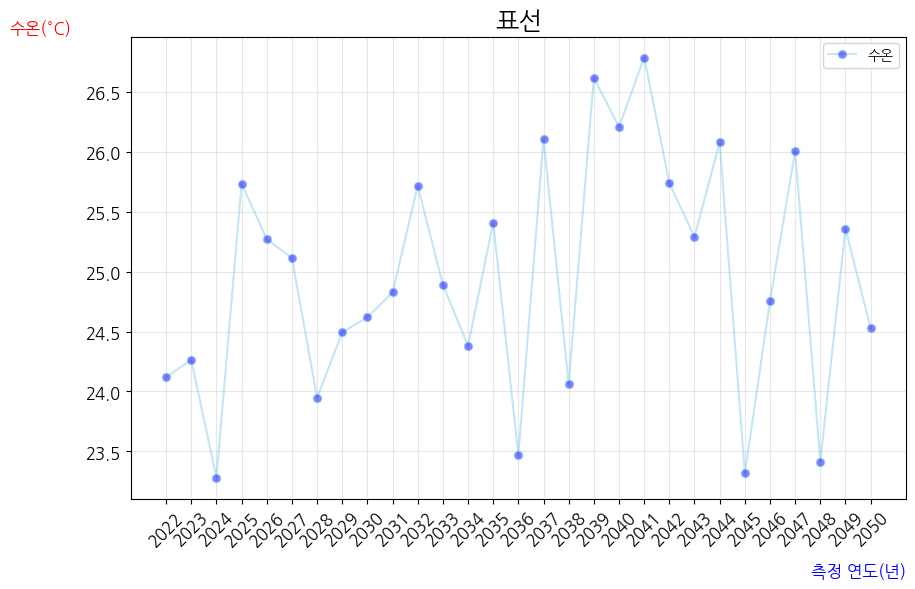

In [15]:
# 주어진 식을 사용하여 예측할 연도 정의
years_to_predict = range(2022, 2051)

# 예측에 사용될 랜덤한 특성 생성
np.random.seed(42)  # 일관된 결과를 위해 시드 설정

# 500 ~ 1200 사이 숫자 두 개로 한 쌍을 만들고 years_to_predict 수 만큼 리스트를 만듦
'''
예) [[ 602  935]
 		 [ 770  606]
 		 [ 571  520]
 		 [1114  621] ...]
'''
features = np.random.randint(500, 1200, size=(len(years_to_predict), 2))

# 주어진 식을 통해 수온 예측
# predicted_temperatures = 17.28 + 0.0042 * features[:, 0] + 0.0017 * features[:, 1]
# features[:, 0] 는 features 리스트 값들 중 첫 번째 값들로 리스트 만듦
# features[:, 1] 는 features 리스트 값들 중 두 번째 값들로 리스트 만듦
predicted_temperatures = last_water_temperature + 0.0042 * features[:, 0] + 0.0017 * features[:, 1]

for year, temp in zip(range(2022, 2051), predicted_temperatures):
    print(f"예측된 {location} {year}년의 11월 수온: {temp: .2f}도")

# 예측 결과를 데이터프레임으로 변환
df = pd.DataFrame({"측정 연도": years_to_predict, "수온": predicted_temperatures})

# 데이터프레임 인덱스 설정
df.set_index('측정 연도', inplace=True)

# 그래프 시각화
plt.figure(figsize=(10, 6))
df["수온"].plot(color="skyblue", alpha=0.5, marker='o', markerfacecolor='blue', markersize=6)
plt.xticks(np.arange(2022, 2051).tolist(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('측정 연도(년)', labelpad=10, loc='right', color='blue', size=12)
plt.ylabel('수온(°C)', labelpad=10, loc='top', rotation=360, color='red', size=12)
plt.grid(alpha=0.3)
plt.title(location, size=18)
plt.legend()
plt.savefig('/content/drive/MyDrive/data/view-3.png')
plt.show()